In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('kidney_disease.csv')

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [5]:
from sklearn.impute import SimpleImputer
mode=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df_imputer=pd.DataFrame(mode.fit_transform(df))
df_imputer.columns=df.columns
df_imputer

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [6]:
for i in df_imputer.columns:
  print()
  print(i)
  print()
  print(set(df_imputer[i].tolist()))
  print()


id

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,

In [7]:
df_imputer['classification']=df_imputer['classification'].apply(lambda x:'ckd' if x=='ckd\t' else x)

df_imputer['rc']=df_imputer['rc'].apply(lambda x:'5.2' if x=='\t?' else x)

df_imputer['wc']=df_imputer['wc'].apply(lambda x:'8400' if x=='\t8400' else x)
df_imputer['wc']=df_imputer['wc'].apply(lambda x:'6200' if x=='\t6200' else x)
df_imputer['wc']=df_imputer['wc'].apply(lambda x:'9800' if x=='\t?' else x)

df_imputer['cad']=df_imputer['cad'].apply(lambda x:'no' if  x=='\tno' else x)

df_imputer['dm']=df_imputer['dm'].apply(lambda x:'yes' if x=='\tyes' else x)
df_imputer['dm']=df_imputer['dm'].apply(lambda x:'yes' if x==' yes' else x)
df_imputer['dm']=df_imputer['dm'].apply(lambda x:'no' if x=='\tno' else x)

df_imputer['pcv']=df_imputer['pcv'].apply(lambda x:'41' if x=='\t?' else x)
df_imputer['pcv']=df_imputer['pcv'].apply(lambda x:'43' if x=='\t43' else x)



In [10]:
from sklearn import preprocessing

In [11]:
encode=df_imputer.apply(preprocessing.LabelEncoder().fit_transform)
encode

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,3,3,1,0,1,1,0,0,...,30,69,33,1,1,0,0,0,0,0
1,1,5,0,3,4,0,1,1,0,0,...,24,53,33,0,0,0,0,0,0,0
2,2,54,3,1,2,3,1,1,0,0,...,17,67,33,0,1,0,1,0,1,0
3,3,40,2,0,4,0,1,0,1,0,...,18,59,18,1,0,0,1,1,1,0
4,4,43,3,1,2,0,1,1,0,0,...,21,65,26,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,3,3,0,0,1,1,0,0,...,33,59,29,0,0,0,0,0,0,1
396,396,34,2,4,0,0,1,1,0,0,...,40,69,43,0,0,0,0,0,0,1
397,397,8,3,3,0,0,1,1,0,0,...,35,58,35,0,0,0,0,0,0,1
398,398,11,1,4,0,0,1,1,0,0,...,37,64,40,0,0,0,0,0,0,1


In [12]:
encode.dtypes

id                int32
age               int32
bp                int32
sg                int32
al                int32
su                int32
rbc               int32
pc                int32
pcc               int32
ba                int32
bgr               int32
bu                int32
sc                int32
sod               int32
pot               int32
hemo              int32
pcv               int32
wc                int32
rc                int32
htn               int32
dm                int32
cad               int32
appet             int32
pe                int32
ane               int32
classification    int32
dtype: object

In [13]:
encode.to_csv('final_preprocessing_data.csv')

In [14]:
x=encode.drop(['id','classification'],axis=1)
y=encode['classification']

<Axes: xlabel='classification', ylabel='count'>

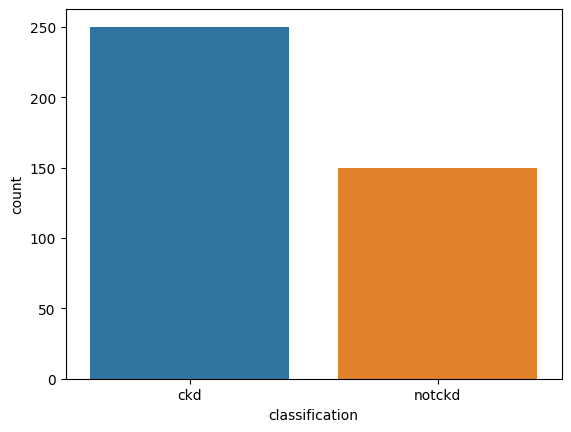

In [82]:
sns.countplot(x='classification',data=df_imputer)

<Axes: xlabel='bp', ylabel='age'>

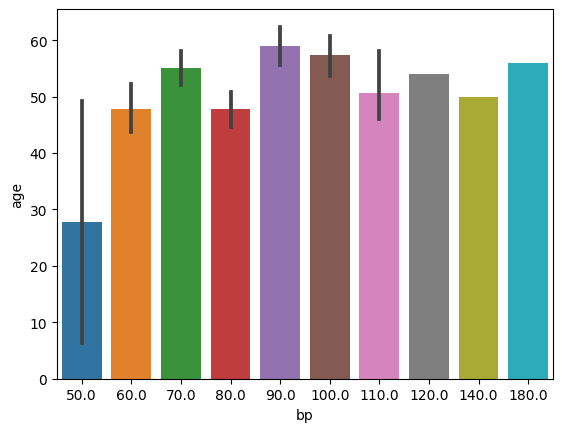

In [83]:
sns.barplot(x='bp',y='age',data=df_imputer)

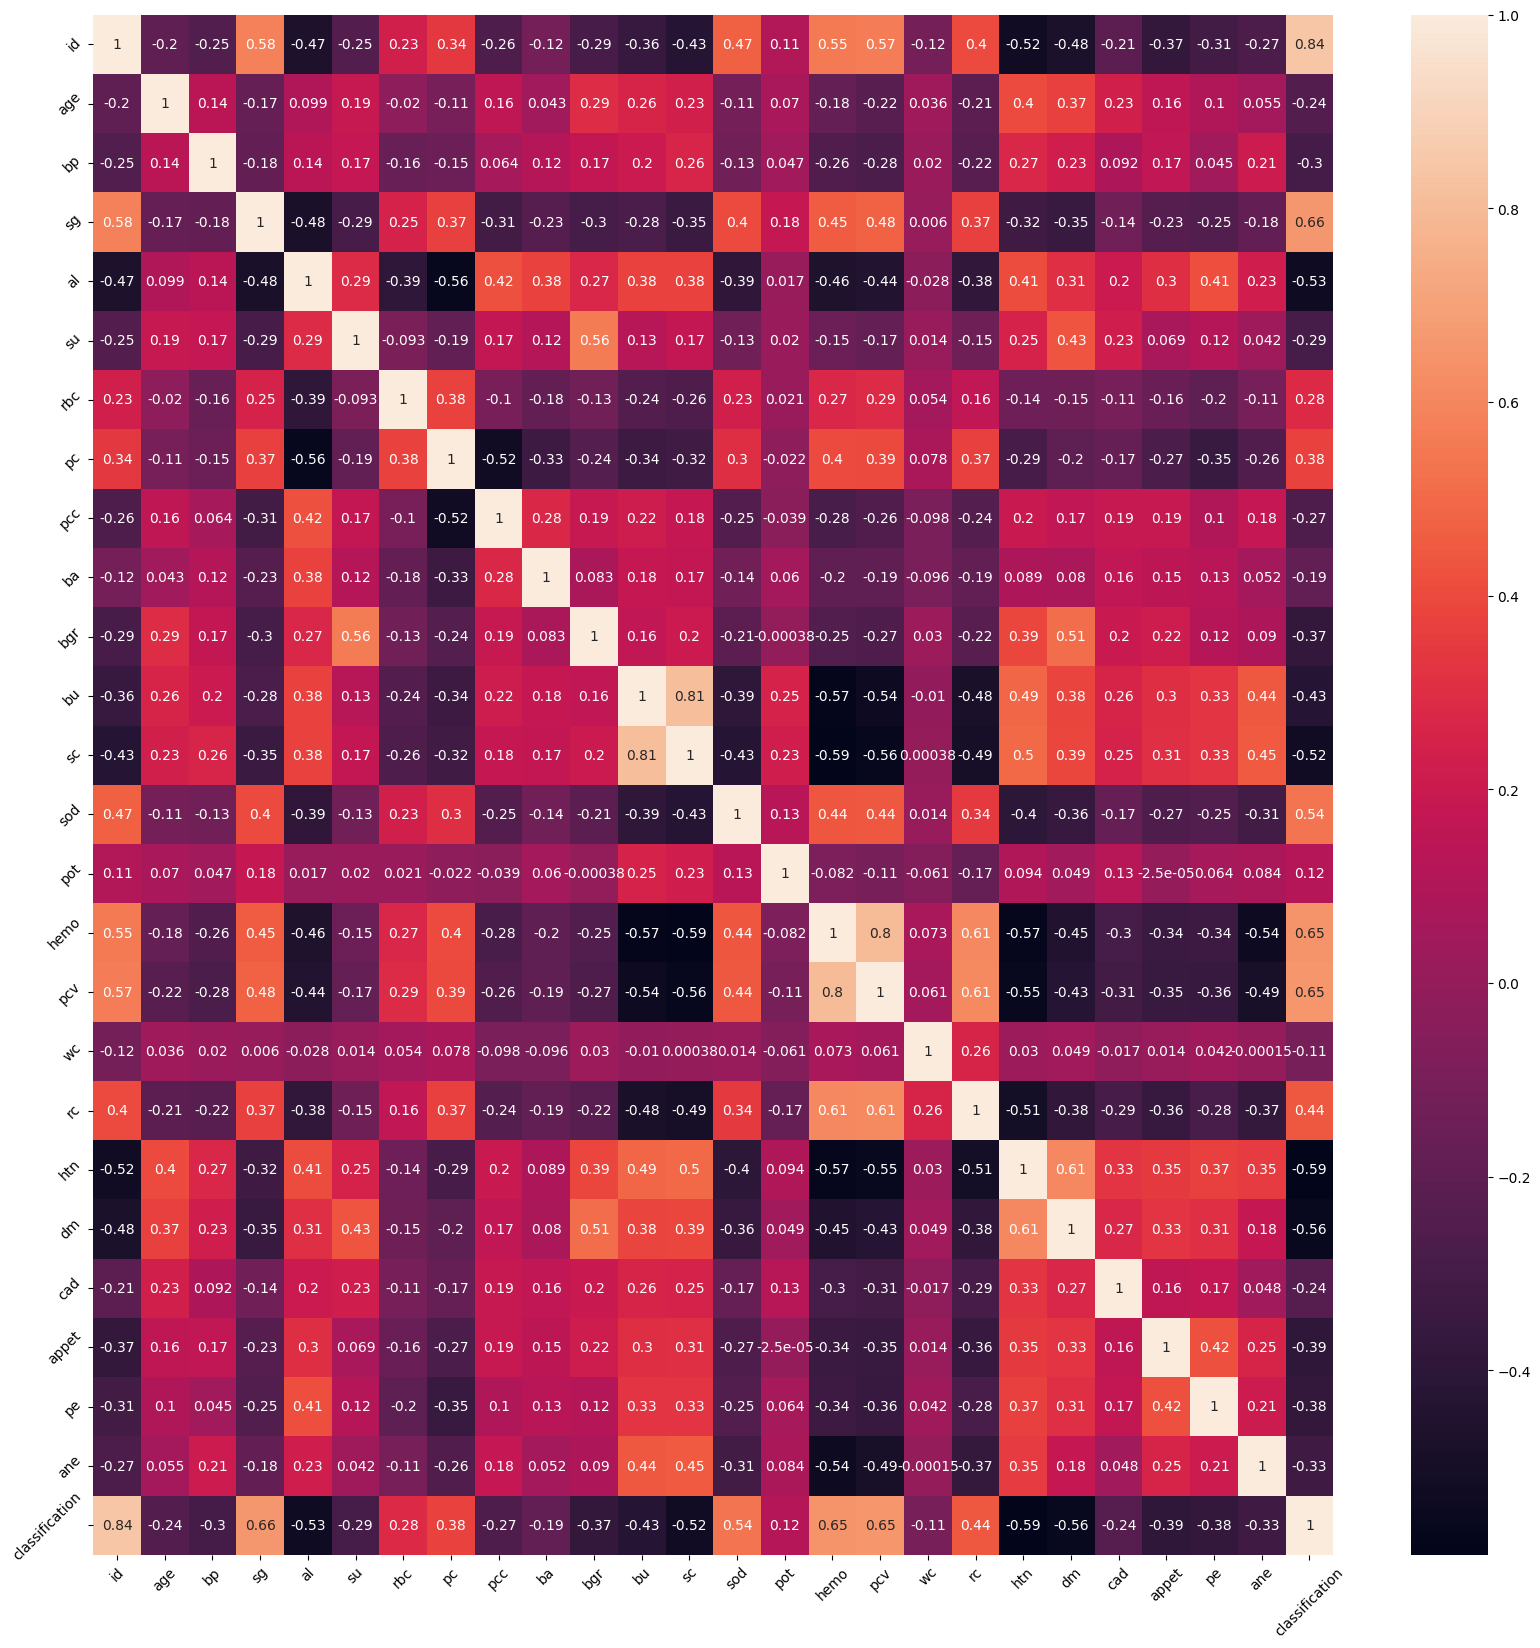

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'encode' is your DataFrame
correlation_matrix = new_df = encode.corr()

# Create a larger figure
plt.figure(figsize=(20, 20))

# Create the heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True)

# Rotate x and y tick labels for better visibility
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()


<Axes: xlabel='hemo'>

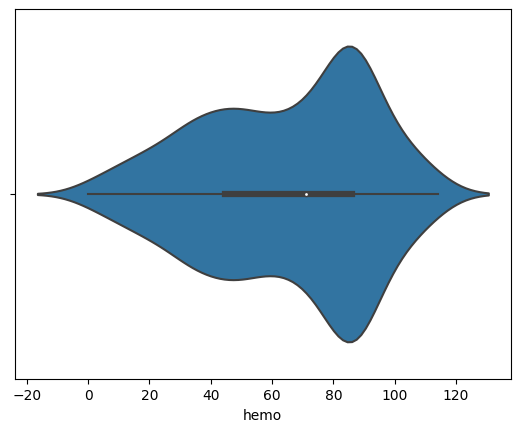

In [115]:
sns.violinplot(x='hemo',data=encode,)

<Axes: xlabel='ba', ylabel='count'>

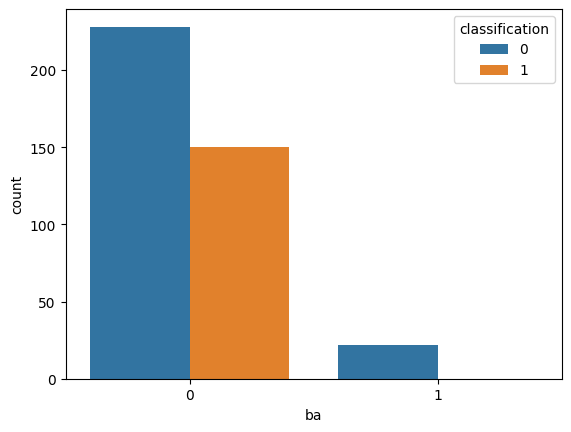

In [108]:
sns.countplot(x='ba',hue='classification',data=encode)

<Axes: xlabel='appet', ylabel='count'>

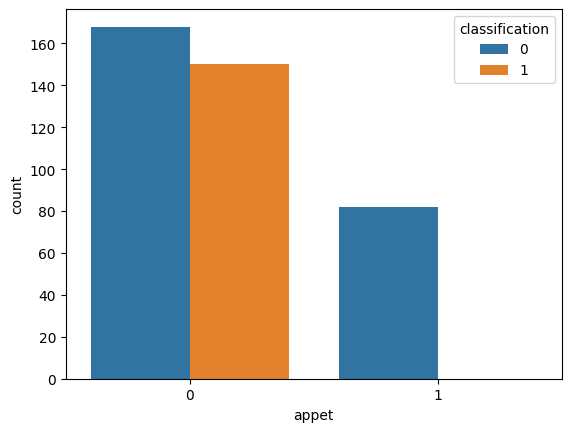

In [109]:
sns.countplot(x='appet',hue='classification',data=encode)

<Axes: xlabel='cad', ylabel='count'>

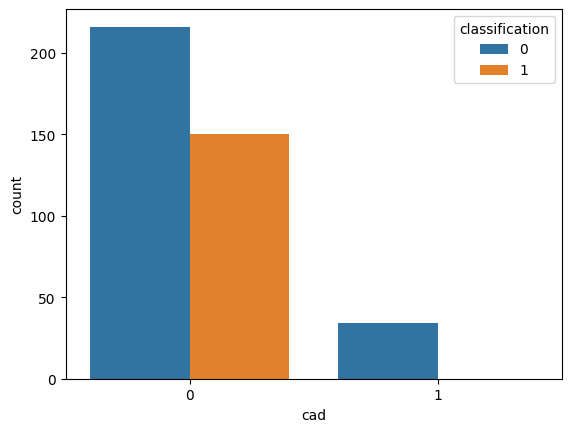

In [110]:
sns.countplot(x='cad',hue='classification',data=encode)

<Axes: xlabel='ane', ylabel='count'>

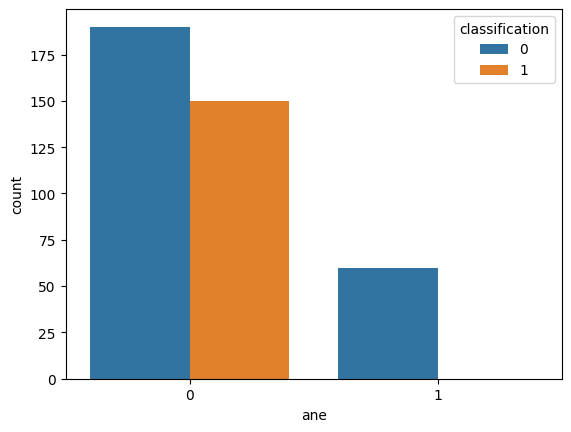

In [111]:
sns.countplot(x='ane',hue='classification',data=encode)

<Axes: xlabel='classification', ylabel='age'>

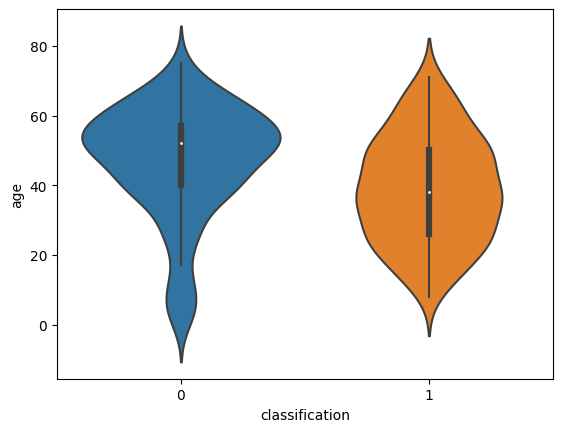

In [112]:
sns.violinplot(x='classification',y='age',data=encode)

<Axes: xlabel='age', ylabel='Density'>

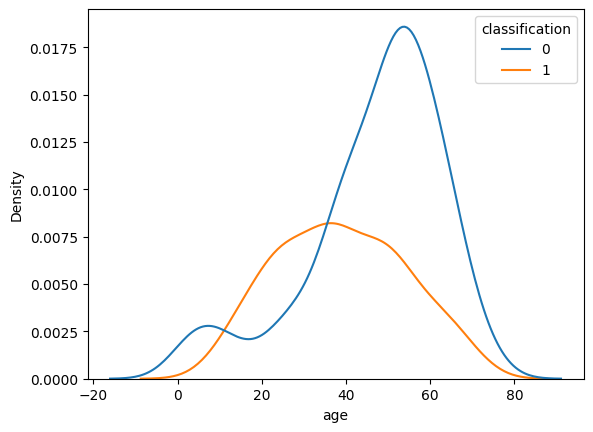

In [114]:
sns.kdeplot(x='age',hue='classification',data=encode)

<Axes: xlabel='bu', ylabel='Density'>

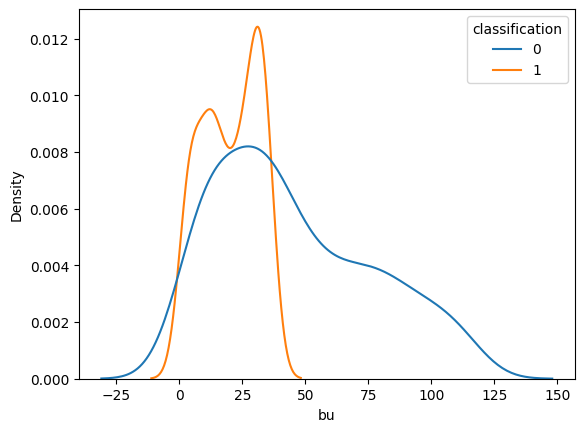

In [124]:
sns.kdeplot(x='bu',hue='classification',data=encode)

In [15]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [16]:
print(Counter(y))

Counter({0: 250, 1: 150})


In [17]:
ros=RandomOverSampler()
x_ros,y_ros=ros.fit_resample(x,y)
print(Counter(y))

Counter({0: 250, 1: 150})


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(x_ros)
y=y_ros

In [19]:
x

array([[ 0.06666667, -0.33333333,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [-0.86666667, -1.        ,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.44      , -0.33333333, -0.5       , ...,  1.        ,
        -1.        ,  1.        ],
       ...,
       [-0.01333333, -0.77777778,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [-0.06666667, -0.77777778,  1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.65333333, -0.77777778,  1.        , ..., -1.        ,
        -1.        , -1.        ]])

# LOGISTIC REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [21]:
from sklearn.decomposition import PCA
pca=PCA(.95)
x_pca=pca.fit_transform(x)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=42)

In [23]:
modelL=LogisticRegression()
modelL.fit(x_train,y_train)

LogisticRegression()

In [24]:
x_train_pred=modelL.predict(x_train)
training_data_accuracy=accuracy_score(x_train_pred,y_train)
training_data_accuracy

0.9975

In [25]:
x_test_pred=modelL.predict(x_test)
test_data_accuracy=accuracy_score(x_test_pred,y_test)
test_data_accuracy

0.97

In [26]:
cm_linear=confusion_matrix(y_test,x_test_pred)
cm_linear

array([[43,  3],
       [ 0, 54]], dtype=int64)

In [27]:
report=classification_report(y_test,x_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        46
           1       0.95      1.00      0.97        54

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



# DECISION TREE

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
modelDT=DecisionTreeClassifier()
modelDT.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
x_train_pred_DT=modelDT.predict(x_train)
training_accuracy_DT=accuracy_score(y_train,x_train_pred_DT)
training_accuracy_DT

1.0

In [31]:
x_test_pred_DT=modelDT.predict(x_test)
test_accuracy_DT=accuracy_score(y_test,x_test_pred_DT)
test_accuracy_DT

0.96

In [32]:
cm_DT=confusion_matrix(y_test,x_test_pred_DT)
cm_DT

array([[44,  2],
       [ 2, 52]], dtype=int64)

In [33]:
report_DT=classification_report(y_test,x_test_pred_DT)
print(report_DT)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        46
           1       0.96      0.96      0.96        54

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



# RANDOM FOREST 

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
model_RF=RandomForestClassifier()
model_RF.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
x_train_pred_RF=model_RF.predict(x_train)
training_accuracy_RF=accuracy_score(y_train,x_train_pred_RF)
training_accuracy_RF

1.0

In [37]:
x_test_pred_RF=modelDT.predict(x_test)
test_accuracy_RF=accuracy_score(y_test,x_test_pred_RF)
test_accuracy_RF

0.96

In [38]:
cm_RF=confusion_matrix(x_test_pred_RF,y_test)
cm_RF

array([[44,  2],
       [ 2, 52]], dtype=int64)

In [39]:
report_RF=classification_report(y_test,x_test_pred_RF)
print(report_RF)


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        46
           1       0.96      0.96      0.96        54

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



# KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
model_knn=KNeighborsClassifier()

In [42]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [43]:
x_train_pred_knn=model_knn.predict(x_train)
x_train_accuracy_knn=accuracy_score(x_train_pred_knn,y_train)
x_train_accuracy_knn

0.9825

In [44]:
x_test_pred_knn=model_knn.predict(x_test)
x_test_accuracy_knn=accuracy_score(x_test_pred_knn,y_test)
x_test_accuracy_knn

0.97

In [45]:
cm_knn=confusion_matrix(x_test_pred_knn,y_test)
cm_knn

array([[43,  0],
       [ 3, 54]], dtype=int64)

In [46]:
report_knn=classification_report(x_test_pred_knn,y_test)
print(report_knn)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.95      0.97        57

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



# Conclusion

1. most the middle age people having normal bp,very few of them under age having low bp,and over age people having high bp
2. 63% of the patient suffering from chronic kidney diease,which means the dataset is imbalanced
3. sg,bu are highly correlated
4. hemo,sodium,pcv less correlated
5. age is no such correlation with the other columns
6. rc is highly correlated with hemoglobin and pcv
7. albumin and hemoglobin has negative correlation
